Source: [click here](https://towardsdatascience.com/introduction-to-natural-language-processing-for-text-df845750fb63)

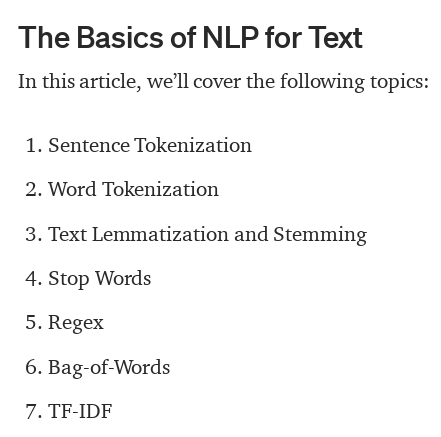

In [10]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# 1. Sentence Tokenization

Sentence tokenization (also called **sentence segmentation**) is the problem of **dividing a string of written language into its component sentences**. The idea here looks very simple. In English and some other languages, we can split apart the sentences whenever we see a punctuation mark.

In [2]:
text = """Backgammon is one of the oldest known board games. 
          Its history can be traced back nearly 5,000 years 
          to archeological discoveries in the Middle East. 
          It is a two player game where each player has fifteen 
          checkers which move between twenty-four points according 
          to the roll of two dice."""
sentences = nltk.sent_tokenize(text)
for i, sentence in enumerate(sentences):
  print(f"sentence {i} = {sentence}")

sentence 0 = Backgammon is one of the oldest known board games.
sentence 1 = Its history can be traced back nearly 5,000 years 
          to archeological discoveries in the Middle East.
sentence 2 = It is a two player game where each player has fifteen 
          checkers which move between twenty-four points according 
          to the roll of two dice.


# 2. Word Tokenization

Word tokenization (also called **word segmentation**) is the problem of **dividing a string of written language into its component words**. In English and many other languages using some form of Latin alphabet, space is a good approximation of a word divider.

**NOTE**

However, we still can have problems if we only split by space to achieve the wanted results. Some English compound nouns are variably written and sometimes they contain a space. In most cases, we use a library to achieve the wanted results, so again don’t worry too much for the details.

In [3]:
for i, sentence in enumerate(sentences):
  words = nltk.word_tokenize(sentence)
  print(f"i = {i}")
  print(words)

i = 0
['Backgammon', 'is', 'one', 'of', 'the', 'oldest', 'known', 'board', 'games', '.']
i = 1
['Its', 'history', 'can', 'be', 'traced', 'back', 'nearly', '5,000', 'years', 'to', 'archeological', 'discoveries', 'in', 'the', 'Middle', 'East', '.']
i = 2
['It', 'is', 'a', 'two', 'player', 'game', 'where', 'each', 'player', 'has', 'fifteen', 'checkers', 'which', 'move', 'between', 'twenty-four', 'points', 'according', 'to', 'the', 'roll', 'of', 'two', 'dice', '.']


# 3. Text Lemmatization and Stemming

+ **Problem**: For grammatical reasons, documents can contain **different forms of a word** such as drive, drives, driving. Also, sometimes we have related words with a similar meaning, such as nation, national, nationality.

+ **Solution**: The goal of both stemming and lemmatization is to **reduce inflectional forms** and sometimes derivationally related forms of a word to a common base form

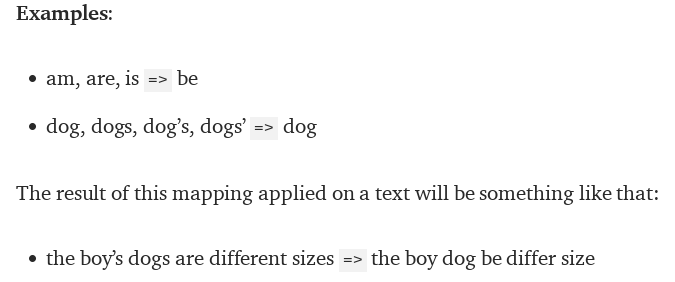

Stemming and lemmatization are special cases of normalization. However, they are different from each other.

**Stemming** usually refers to a crude heuristic process that chops off the ends of words in the hope of achieving this goal correctly most of the time, and often includes the removal of derivational affixes.

**Lemmatization** usually refers to doing things properly with the use of a vocabulary and morphological analysis of words, normally aiming to remove inflectional endings only and to return the base or dictionary form of a word, which is known as the lemma.

**Difference:** The difference is that a **stemmer operates without knowledge of the context**, and therefore cannot understand the difference between words which have different meaning depending on part of speech. But the stemmers also have some advantages, they are easier to implement and usually run faster. Also, the reduced “accuracy” may not matter for some applications.

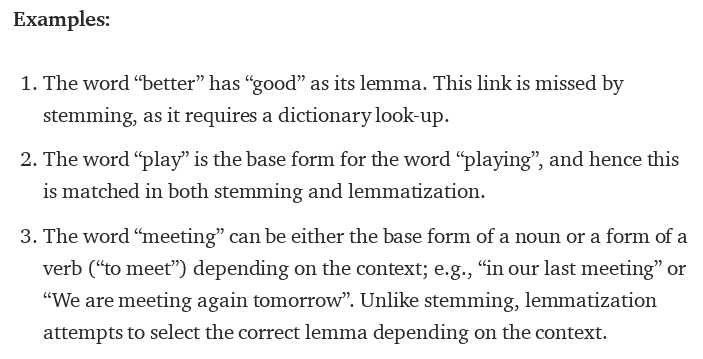

In [4]:
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import wordnet

def compare_stemmer_and_lemmatizer(stemmer, lemmatizer, word, pos):
    """
    Print the results of stemmind and lemmitization using the passed stemmer, lemmatizer, word and pos (part of speech)
    """
    print("Stemmer:", stemmer.stem(word))
    print("Lemmatizer:", lemmatizer.lemmatize(word, pos))
    print()

lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()
compare_stemmer_and_lemmatizer(stemmer, lemmatizer, word = "seen", pos = wordnet.VERB)
compare_stemmer_and_lemmatizer(stemmer, lemmatizer, word = "drove", pos = wordnet.VERB)
compare_stemmer_and_lemmatizer(stemmer, lemmatizer, word = "gone", pos = wordnet.VERB)

Stemmer: seen
Lemmatizer: see

Stemmer: drove
Lemmatizer: drive

Stemmer: gone
Lemmatizer: go



# 4. Stop words

Stop words are words which are **filtered out before or after processing of text**. When applying machine learning to text, these words can add a lot of noise. That’s why we want to **remove these irrelevant words**.

Stop words usually refer to the most common words **such as “and”, “the”, “a” in a language**, but there is no single universal list of stopwords. The list of the stop words can change depending on your application.

In [5]:
from nltk.corpus import stopwords
print(stopwords.words("english"))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [6]:
stop_words = set(stopwords.words("english"))
sentence = "Backgammon is one of the oldest known board games."

words = nltk.word_tokenize(sentence)
without_stop_words = [word for word in words if not word in stop_words]
print(without_stop_words)

['Backgammon', 'one', 'oldest', 'known', 'board', 'games', '.']


# 5. Regex

Follow my own intructions [click here](https://colab.research.google.com/drive/1oOhouPcpZyF8d2X4CwIRjloRss7iBz8c?usp=sharing)

# 6. Bag-of-words

Machine learning algorithms cannot work with raw text directly, we need to convert the text into vectors of numbers. This is called **feature extraction**.

**The bag-of-words model is a popular and simple feature extraction technique** used when we work with text. It describes the occurrence of each word within a document.

To use this model, we need to:

+ 1. Design a **vocabulary** of known words (also called **tokens**)
+ 2. Choose a **measure of the presence** of known words

Any information about the order or structure of words is discarded. That’s why it’s called a bag of words. This model is trying to understand whether a known word occurs in a document, but don’t know where is that word in the document.

+ 1. Load data

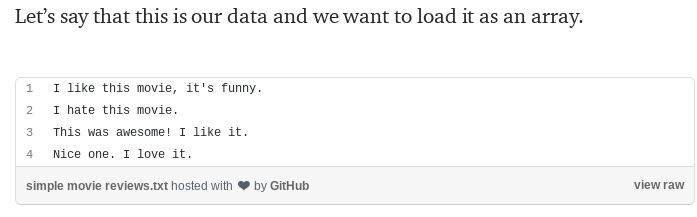

In [7]:
# for simple, we create the list
documents = ["I like this movie, it's funny.", 'I hate this movie.', 'This was awesome! I like it.', 'Nice one. I love it.']
documents

["I like this movie, it's funny.",
 'I hate this movie.',
 'This was awesome! I like it.',
 'Nice one. I love it.']

+ 2. Design the Vocabulary

Let’s get all the unique words from the four loaded sentences ignoring the case, punctuation, and one-character tokens. These words will be our vocabulary (known words).

We can use the **CountVectorizer** class from the sklearn library to design our vocabulary. We’ll see how we can use it after reading the next step, too.

In [8]:
# Step 2. Design the Vocabulary
# The default token pattern removes tokens of a single character. That's why we don't have the "I" and "s" tokens in the output
count_vectorizer = CountVectorizer()

+ 3. Create the Document Vectors

Next, we need to score the words in each document. The task here is to convert each raw text into a vector of numbers. After that, we can use these vectors as input for a machine learning model. The simplest scoring method is to mark the presence of words with 1 for present and 0 for absence.

In [9]:
# Step 3. Create the Bag-of-Words Model
bag_of_words = count_vectorizer.fit_transform(documents)

# Show the Bag-of-Words Model as a pandas DataFrame
feature_names = count_vectorizer.get_feature_names()
documents_vectors_df = pd.DataFrame(bag_of_words.toarray(), columns = feature_names)
documents_vectors_df

,awesome,funny,hate,it,like,love,movie,nice,one,this,was
0,0,1,0,1,1,0,1,0,0,1,0
1,0,0,1,0,0,0,1,0,0,1,0
2,1,0,0,1,1,0,0,0,0,1,1
3,0,0,0,1,0,1,0,1,1,0,0


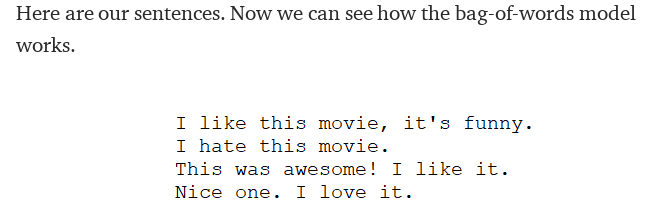

+ Notes on the Bag of Words Model

The complexity of the bag-of-words model comes in deciding how to design the vocabulary of known words (tokens) and how to score the presence of known words.

# 6.1 Designing the Vocabulary

When the vocabulary **size increases**, the vector representation of the documents also increases. In the example above, the length of the document vector is equal to the number of known words.

In some cases, we can have a huge amount of data and in this cases, the length of the vector that represents a document might be thousands or millions of elements. Furthermore, **each document may contain only a few of the known words in the vocabulary** --> **Sparse vectors**.

Therefore the vector representations will have a lot of zeros. These vectors which have a lot of zeros are called sparse vectors. They require more memory and computational resources.

We can decrease the number of the known words when using a bag-of-words model to decrease the required memory and computational resources. **We can use the text cleaning techniques** we’ve already seen in this article before we create our bag-of-words model:

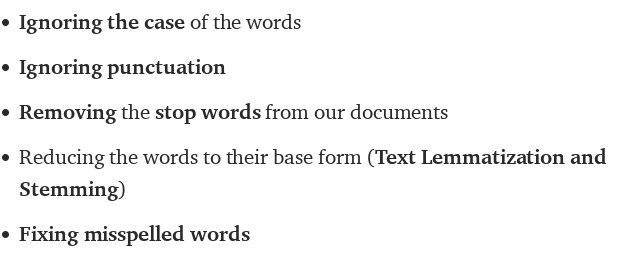

**Bag-of-Bigrams**


Other challenge:


Another more complex way to create a vocabulary is to use **grouped words**. This changes the scope of the vocabulary and allows the bag-of-words model to get more details about the document. **This approach is called n-grams**

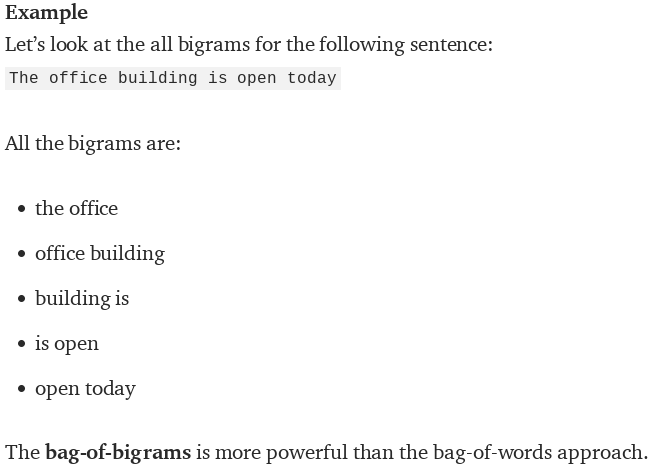

**Scoring words**

we have created our vocabulary of known words, we need to score the occurrence of the words in our data. We saw one very simple approach - the binary approach (1 for presence, 0 for absence).


Some additional scoring methods are:

+ **Counts**. Count the number of times each word appears in a document.
+ **Frequencies**. Calculate the frequency that each word appears in document out of all the words in the document.

# 7. TF-IDF

**Problem**: One problem with scoring word frequency is that the most frequent words in the document start to have the highest scores. These frequent words may not contain as much **“informational gain”** to the model compared with some rarer and domain-specific words.

**Solution**: One approach to fix that problem is to penalize words that are frequent across all the documents. **This approach is called TF-IDF**.

TF-IDF, short for **term frequency-inverse document frequency is a statistical measure** used to evaluate the importance of a word to a document in a collection or corpus.

The TF-IDF scoring value increases proportionally to the number of times a word appears in the document, but it is offset by the number of documents in the corpus that contain the word.

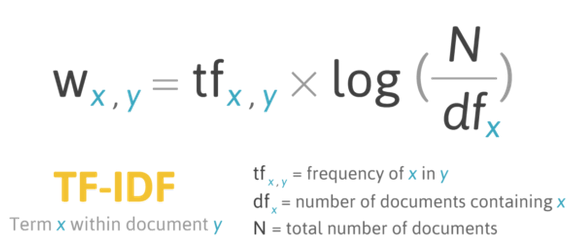

**Term Frequency (TF)**: a scoring of the frequency of the word in the current document.

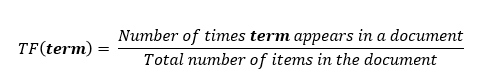

**Inverse Term Frequency (ITF)**:  a scoring of how rare the word is across documents

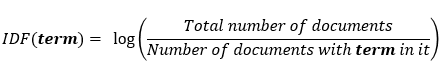

**TF-IDF score**

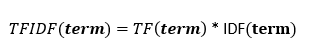

In [11]:
tfidf_vectorizer = TfidfVectorizer()
values = tfidf_vectorizer.fit_transform(documents)

# Show the Model as a pandas DataFrame
feature_names = tfidf_vectorizer.get_feature_names()
tf_idf_document_df = pd.DataFrame(values.toarray(), columns = feature_names)
tf_idf_document_df

,awesome,funny,hate,it,like,love,movie,nice,one,this,was
0,0.000000,0.571848,0.000000,0.365003,0.450852,0.000000,0.450852,0.000000,0.000000,0.365003,0.000000
1,0.000000,0.000000,0.702035,0.000000,0.000000,0.000000,0.553492,0.000000,0.000000,0.448100,0.000000
2,0.539445,0.000000,0.000000,0.344321,0.425305,0.000000,0.000000,0.000000,0.000000,0.344321,0.539445
3,0.000000,0.000000,0.000000,0.345783,0.000000,0.541736,0.000000,0.541736,0.541736,0.000000,0.000000


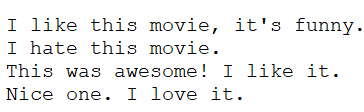

# Summary

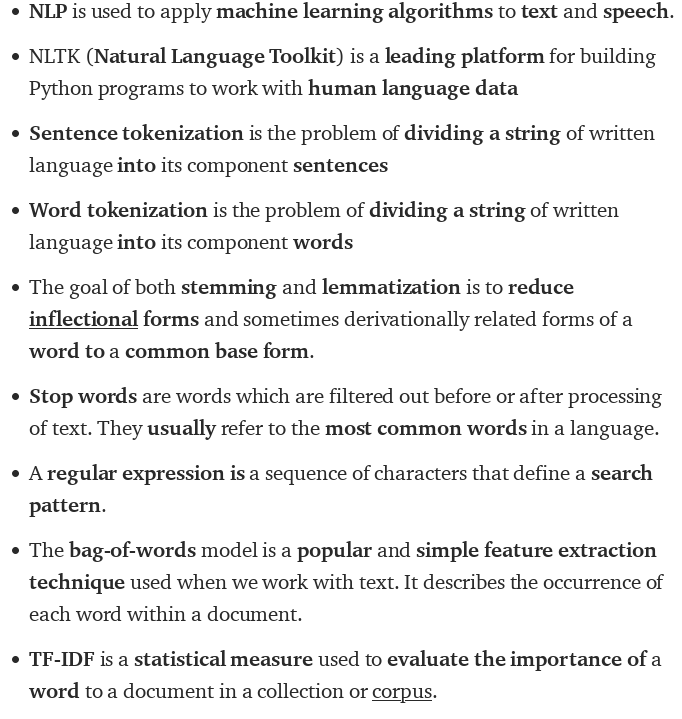